In [6]:
from sklearn.model_selection import train_test_split
from models import BaselineModel, RuleBasedModel

In [7]:
x_set = []
y_set = []

with open("data/dialog_acts.dat", 'r') as file:
    for line in file:
        y_set.append(line.split()[0])
        x_set.append(" ".join(line.split()[1:]).lower())
        
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2, random_state=42)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2, random_state=42)
 
x_train[:3], y_train[:3]

(['find me a moderately priced restaurant in the west part of town',
  'thank you good bye',
  'yes'],
 ['inform', 'thankyou', 'affirm'])

In [4]:
model = BaselineModel()

In [5]:
model.train(x_train, y_train)

In [6]:
model.predict('Hi!')

'inform'

In [7]:
accuracy, precision, recall, f1 = model.evaluate(x_test, y_test)

In [8]:
accuracy, precision, recall, f1

(0.40011762399529505,
 0.1600941130316403,
 0.40011762399529505,
 0.22868666216029043)

In [9]:
keyword_dict = {
            'ack': ['kay', 'okay', 'good', 'fine'],
            'affirm': ['yes', 'right', 'correct', 'yeah', 'ye', 'right', 'correct', 'perfect'],
            'bye': ['good', 'bye'],
            'confirm': ['does', 'is', 'it'],
            'deny': ['wrong', 'want', 'dont'],
            'hello': ['hi', 'hello', 'im', 'looking'],
            'inform': ['any', 'food', 'dont', 'care', 'expensive', 'moderate', 'cheap', 'east', 'west', 'north', 'south', 'centre', 'town', 'area', 'im', 'need', 'restaurant', 'looking'],
            'negate': ['no'],
            'null': ['unintelligible', 'noise', 'what', 'uh', 'sil', 'laughing'],
            'repeat': ['repeat', 'back', 'go', 'again'],
            'reqalts': ['else', 'next', 'how', 'about', 'any', 'anything', 'is', 'there', 'other'],
            'reqmore': ['more'],
            'request': ['type', 'phone', 'number', 'address', 'post', 'code', 'could', 'what', 'is', 'the', 'type', 'whats', 'may', 'i'],
            'restart': ['start', 'over', 'reset'],
            'thankyou': ['thank', 'you', 'good', 'bye', 'goodbye'],
        }

In [10]:
keyword_dict.values()

dict_values([['kay', 'okay', 'good', 'fine'], ['yes', 'right', 'correct', 'yeah', 'ye', 'right', 'correct', 'perfect'], ['good', 'bye'], ['does', 'is', 'it'], ['wrong', 'want', 'dont'], ['hi', 'hello', 'im', 'looking'], ['any', 'food', 'dont', 'care', 'expensive', 'moderate', 'cheap', 'east', 'west', 'north', 'south', 'centre', 'town', 'area', 'im', 'need', 'restaurant', 'looking'], ['no'], ['unintelligible', 'noise', 'what', 'uh', 'sil', 'laughing'], ['repeat', 'back', 'go', 'again'], ['else', 'next', 'how', 'about', 'any', 'anything', 'is', 'there', 'other'], ['more'], ['type', 'phone', 'number', 'address', 'post', 'code', 'could', 'what', 'is', 'the', 'type', 'whats', 'may', 'i'], ['start', 'over', 'reset'], ['thank', 'you', 'good', 'bye', 'goodbye']])

In [1]:
from models import RuleBasedModel

In [2]:
model = RuleBasedModel()


In [5]:
input = 'Repeat please'

In [6]:
model.predict(input)

'repeat'

In [1]:
from ml_models import LR_WE_Model

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yamroza/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
model = LR_WE_Model()

In [3]:
model.load('./models/lr_we_classifier.keras')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
x_set = []
y_set = []

with open("data/dialog_acts.dat", 'r') as file:
    for line in file:
        y_set.append(line.split()[0])
        x_set.append(" ".join(line.split()[1:]).lower())
        
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2, random_state=42)

In [6]:
y_pred = []
for elem in x_test:
    y_pred.append(model.predict([elem]))

In [7]:
labels=["inform", "thankyou",'affirm','request','reqalts','negate','null','bye','deny','confirm','hello','restart','repeat','ack','reqmore']

In [8]:
confusion_matrix(y_test, y_pred, labels=labels)

array([[ 355,    2,    1, 1657,   20,    1,    0,    0,    0,    0,    0,
           0,    1,    2,    2],
       [  11,    0,    0,  623,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  13,    0,    0,  234,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 477,    0,    0,  828,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  45,    0,    0,  323,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  38,    0,    0,   43,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 125,    0,    0,  184,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   3,    0,    0,   43,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   4,    0,    0,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  16,    0,    0,   17,    0,

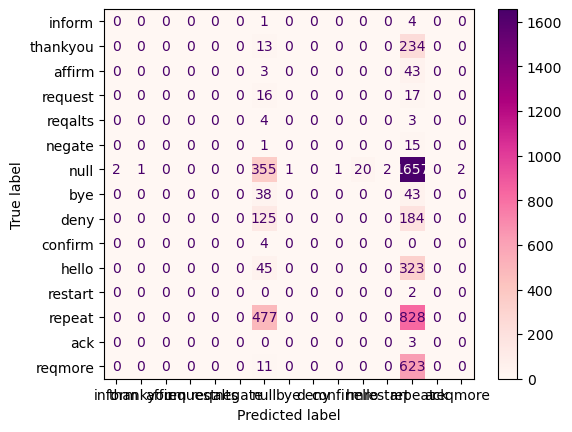

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='RdPu', display_labels=labels)
plt.savefig('./data/conf_matrix.png')